In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import plotly.offline as pyo

In [2]:
df = pd.read_csv("gdp.csv")

In [3]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [4]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

## Check description of each column

In [6]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


In [7]:
df["Country Name"].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [8]:
df["Country Code"].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [9]:
df["Year"].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

## Analysing Arab World

<Axes: xlabel='Year'>

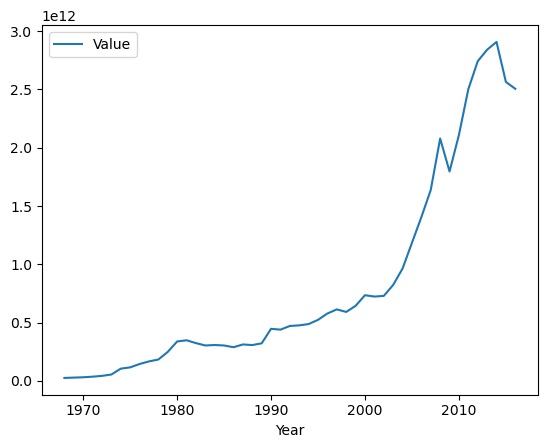

In [11]:
df[df["Country Name"] == "Arab World"].plot(kind = 'line', x = "Year", y = "Value")

## Finding GDP Growth for all the countries

In [25]:
new_data = []

for country_name in df['Country Name'].unique():

    df_gdp = df[df['Country Name'] == country_name]
    data = df_gdp.values
    
    gdp_change = [0]

    for i in range(1, len(data)):
        prev_gdp = data[i - 1][3]
        curr_gdp = data[i][3]

        gdp_change.append(round(((curr_gdp - prev_gdp) / prev_gdp) * 100, 2))

    df_gdp = df_gdp.assign(GDP_Growth = gdp_change)
    new_data.append(df_gdp)

df = pd.concat(new_data, axis = 0)

In [43]:
df[df['Country Code'] == 'AFG']

,Country Name,Country Code,Year,Value,GDP_Growth
2306,Afghanistan,AFG,1960,5.377778e+08,0.00
2307,Afghanistan,AFG,1961,5.488889e+08,2.07
2308,Afghanistan,AFG,1962,5.466667e+08,-0.40
2309,Afghanistan,AFG,1963,7.511112e+08,37.40
2310,Afghanistan,AFG,1964,8.000000e+08,6.51
2311,Afghanistan,AFG,1965,1.006667e+09,25.83
2312,Afghanistan,AFG,1966,1.400000e+09,39.07
2313,Afghanistan,AFG,1967,1.673333e+09,19.52
2314,Afghanistan,AFG,1968,1.373333e+09,-17.93
2315,Afghanistan,AFG,1969,1.408889e+09,2.59


## Maximum growth of GDP for every country per year

In [58]:
df.groupby('Country Name').max()['GDP_Growth'].sort_values(ascending = False)

Country Name
Switzerland          479.82
Equatorial Guinea    409.33
Cambodia             330.58
Congo, Dem. Rep.     305.16
Oman                 240.75
                      ...  
Barbados              12.76
North America         12.14
Aruba                 11.01
Guam                   8.82
Somalia                5.51
Name: GDP_Growth, Length: 256, dtype: float64

## Visualisation using Plotly library

## Analysing World GDP

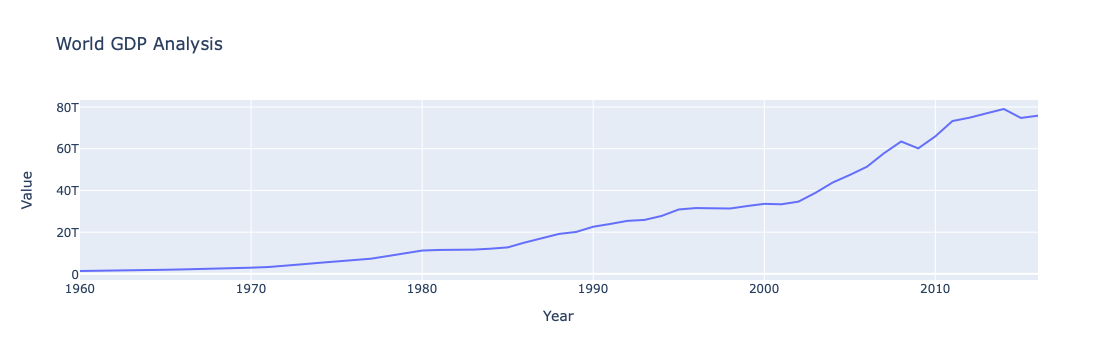

In [68]:
df_world = df[df['Country Name'] == "World"]

fig = px.line(df_world, x = 'Year', y = 'Value', title = "World GDP Analysis")
fig

In [70]:
pyo.plot(fig, filename = "World GDP.html")

'World GDP.html'

## GDP plots for all countries saved to a directory

In [75]:
os.mkdir('GDP_Plots')

for country_name in df['Country Name'].unique():
    
    df_new = df[df['Country Name'] == country_name]
    fig = px.line(df_new, x = 'Year', y = 'Value', title = country_name + " GDP Analysis")
    pyo.plot(fig, filename = 'GDP_Plots/' + country_name + " GDP.html", auto_open = False)

## GDP visualisation of all countries

In [78]:
fig = px.line(df, x = 'Year', y = 'Value', title = "GDP Analysis", color = 'Country Name')
pyo.plot(fig, filename = "GDP_Analysis.html")

'GDP_Analysis.html'

## GDP Comparison of two countries

In [85]:
c1 = df[df['Country Name'] == "China"]
c2 = df[df['Country Name'] == "India"]

df_new = pd.concat([c1,c2], axis = 0)

In [87]:
fig = px.line(df_new, x = 'Year', y = 'Value', title = "GDP Analysis", color = 'Country Name')
pyo.plot(fig, filename = "GDP_Analysis_IND_vs_CHINA.html")

'GDP_Analysis_IND_vs_CHINA.html'

## Custom function to visualise GDP comparison of specific countries

In [94]:
lst_countries = ['IND', 'ITA', 'USA', 'CHN']

def  compare_gdp(lst):
    dfs = []
    for i in lst_countries:
        dfs.append(df[df['Country Code'] == i])

        df_new = pd.concat(dfs, axis = 0)

    fig = px.line(df_new, x = 'Year', y = 'Value', title = "GDP Analysis", color = 'Country Name')
    pyo.plot(fig, filename = '-'.join(lst_countries) + "_GDP_Analysis.html")

In [96]:
compare_gdp(lst_countries)